# Singapore Resale Flat Prices

In [48]:
# reading and viewing the dataset

import pandas as pd

# reading all the csv files 
data1 =pd.read_csv(r"D:\skill enhancement sec\ResaleFlatPricesBasedonApprovalDate19901999.csv")
data2 =pd.read_csv(r"D:\skill enhancement sec\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
data3 =pd.read_csv(r"D:\skill enhancement sec\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
data4 =pd.read_csv(r"D:\skill enhancement sec\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
data5 =pd.read_csv(r"D:\skill enhancement sec\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

# using pandas concat function to merge all the cs files
data =pd.concat([data1,data2,data3,data4,data5],ignore_index=True)
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


## EDA

In [49]:
# shape of the dataset
print(f' Shape of the Dataset : {data.shape}')

 Shape of the Dataset : (911362, 11)


In [50]:
# numerical values info 
print(f'Numerical Description of the Dataset : \n\n{data.describe()}')

Numerical Description of the Dataset : 

       floor_area_sqm  lease_commence_date  resale_price
count   911362.000000        911362.000000  9.113620e+05
mean        95.699384          1988.103394  3.160808e+05
std         25.857138            10.484287  1.664517e+05
min         28.000000          1966.000000  5.000000e+03
25%         73.000000          1981.000000  1.905000e+05
50%         93.000000          1986.000000  2.930000e+05
75%        113.000000          1996.000000  4.100000e+05
max        307.000000          2022.000000  1.500000e+06


In [51]:
print(f' Data Types : \n\n{data.dtypes}')

 Data Types : 

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object


In [52]:
# checking for null values
print(f'Num of NULL Values in the datset :\n\n{data.isnull().sum()}')

Num of NULL Values in the datset :

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64


In [53]:
# as the null value of remaining lease column has 70% of null values , replacing it rather than removing
data['remaining_lease'].fillna(0,inplace=True)

#data after treated with null value
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0


In [54]:
# checking for null values
print(f'Num of NULL Values in the datset after treating :\n\n{data.isnull().sum()}')

Num of NULL Values in the datset after treating :

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64


In [55]:
# looking into unique values in flat_type
print(f'Value Counts for Flat Type : \n\n{data.flat_type.value_counts()}')

Value Counts for Flat Type : 

flat_type
4 ROOM              345561
3 ROOM              292078
5 ROOM              191831
EXECUTIVE            68678
2 ROOM               11377
1 ROOM                1299
MULTI GENERATION       279
MULTI-GENERATION       259
Name: count, dtype: int64


In [56]:
# merging the data with same name
data.flat_type =data.flat_type.replace('MULTI-GENERATION','MULTI GENERATION')

In [57]:
print(f'Replacing the same value into one : \n\n{data.flat_type.value_counts()}')

Replacing the same value into one : 

flat_type
4 ROOM              345561
3 ROOM              292078
5 ROOM              191831
EXECUTIVE            68678
2 ROOM               11377
1 ROOM                1299
MULTI GENERATION       538
Name: count, dtype: int64


In [58]:
# looking into unique values in town
print(f'Value Counts for Town  : \n\n{data.town.value_counts()}')

Value Counts for Town  : 

town
TAMPINES           78867
YISHUN             68981
BEDOK              65884
JURONG WEST        65567
WOODLANDS          64385
ANG MO KIO         51468
HOUGANG            49796
BUKIT BATOK        43436
CHOA CHU KANG      37602
BUKIT MERAH        33761
PASIR RIS          32843
SENGKANG           31338
TOA PAYOH          31115
QUEENSTOWN         28394
GEYLANG            27843
CLEMENTI           27722
BUKIT PANJANG      27219
KALLANG/WHAMPOA    26717
JURONG EAST        24457
SERANGOON          22570
BISHAN             21058
PUNGGOL            19515
SEMBAWANG          13270
MARINE PARADE       7966
CENTRAL AREA        7040
BUKIT TIMAH         2484
LIM CHU KANG          64
Name: count, dtype: int64


In [59]:
# looking into unique values in storey range
print(f'Value Counts for Storey Range  : \n\n{data.storey_range.value_counts()}')

Value Counts for Storey Range  : 

storey_range
04 TO 06    228935
07 TO 09    206816
01 TO 03    183612
10 TO 12    175988
13 TO 15     60494
16 TO 18     23486
19 TO 21     11108
22 TO 24      7242
25 TO 27      3317
01 TO 05      2700
06 TO 10      2474
28 TO 30      1559
11 TO 15      1259
31 TO 33       578
34 TO 36       540
37 TO 39       487
16 TO 20       265
40 TO 42       236
21 TO 25        92
43 TO 45        63
46 TO 48        46
26 TO 30        39
49 TO 51        17
36 TO 40         7
31 TO 35         2
Name: count, dtype: int64


In [60]:
# looking into unique values in flat model
print(f'Value Counts for Flat Model : \n\n{data.flat_model.value_counts()}')

Value Counts for Flat Model : 

flat_model
Model A                   188397
Improved                  164530
New Generation            108216
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          45216
Simplified                 33748
Apartment                  25090
Standard                   24815
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17048
MAISONETTE                 12215
Model A2                    9962
APARTMENT                   9901
DBSS                        3141
Adjoined flat               1231
Model A-Maisonette          1068
MODEL A-MAISONETTE           982
Terrace                      440
Type S1                      426
MULTI GENERATION             279
Multi Generation             259
TERRACE                      247
Type S2                      210
Premium Apartment Loft       103
Premium Maisonette            86
Improved-Maisonette           81


In [61]:
# merging the all the values having same name
data['flat_model']=data['flat_model'].replace('NEW GENERATION','New Generation')
data['flat_model']=data['flat_model'].replace('IMPROVED','Improved')
data['flat_model']=data['flat_model'].replace('MULTI GENERATION','Multi Generation')
data['flat_model']=data['flat_model'].replace('2-ROOM','2-room')
data['flat_model']=data['flat_model'].replace('MODEL A-MAISONETTE','Model A-Maisonette')
data['flat_model']=data['flat_model'].replace('MODEL A','Model A')
data['flat_model']=data['flat_model'].replace('SIMPLIFIED','Simplified')
data['flat_model']=data['flat_model'].replace('STANDARD','Standard')
data['flat_model']=data['flat_model'].replace('APARTMENT','Apartment')
data['flat_model']=data['flat_model'].replace('MAISONETTE','Maisonette')
data['flat_model']=data['flat_model'].replace('IMPROVED-MAISONETTE','Improved-Maisonette')
data['flat_model']=data['flat_model'].replace('TERRACE','Terrace')

print(f'Replacing value with same name in one :\n\n{data.flat_model.value_counts()}')

Replacing value with same name in one :

flat_model
Model A                   258778
Improved                  238119
New Generation            187114
Simplified                 57006
Premium Apartment          45216
Standard                   42190
Apartment                  34991
Maisonette                 29263
Model A2                    9962
DBSS                        3141
Model A-Maisonette          2050
Adjoined flat               1231
Terrace                      687
Multi Generation             538
Type S1                      426
Type S2                      210
Improved-Maisonette          125
Premium Apartment Loft       103
2-room                        99
Premium Maisonette            86
3Gen                          21
PREMIUM APARTMENT              6
Name: count, dtype: int64


In [62]:
# converting the month column into datatime format
data['month']=pd.to_datetime(data['month'])

# separating year and month and assing it into new column
data['year']=data['month'].dt.year
data['no_of_month']=data['month'].dt.month

In [63]:
new_data=data
new_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,no_of_month
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,0,1990,1
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,0,1990,1
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,0,1990,1
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,0,1990,1
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,0,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911357,2023-11-01,YISHUN,4 ROOM,454,YISHUN ST 41,04 TO 06,93.0,Model A,2013,540000.0,88 years 10 months,2023,11
911358,2023-11-01,YISHUN,4 ROOM,626,YISHUN ST 61,04 TO 06,83.0,Simplified,1987,480000.0,62 years 07 months,2023,11
911359,2023-11-01,YISHUN,4 ROOM,851,YISHUN ST 81,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months,2023,11
911360,2023-11-01,YISHUN,5 ROOM,315C,YISHUN AVE 9,04 TO 06,112.0,Improved,2015,645000.0,91 years,2023,11


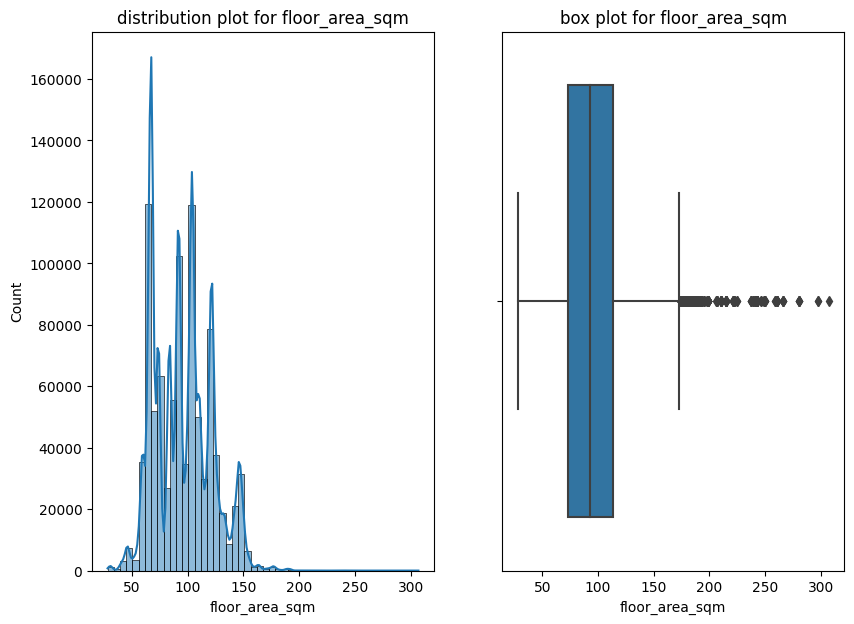

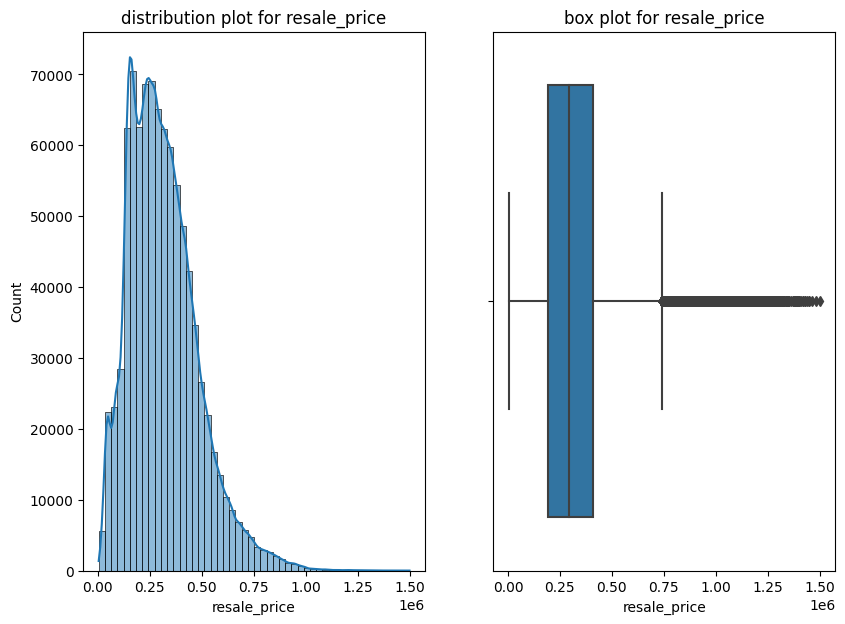

In [64]:
# treating skewness and outliers will help our machine to perform well
import seaborn as sns
import matplotlib.pyplot as plt


def plot(new_data,col):
    # using distribution plot to know direction of the skewness
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    sns.histplot(data=new_data,x=col,kde=True,bins=50)
    plt.title(f'distribution plot for {col}')
    
    # using box plot to identify the outliers
    plt.subplot(1,3,2)
    sns.boxplot(data=new_data,x=col)
    plt.title(f'box plot for {col}')
    plt.show()

    
list1 =['floor_area_sqm','resale_price',]
for i in list1:
    plot(new_data,i)

In [65]:
# performing log transformation for skewed columns
import numpy as np

new_data['resale_price-log']=np.log(new_data['resale_price'])
new_data['floor_area_sqm-log']=np.log(new_data['floor_area_sqm'])
new_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,no_of_month,resale_price-log,floor_area_sqm-log
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,0,1990,1,9.104980,3.433987
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,0,1990,1,8.699515,3.433987
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,0,1990,1,8.987197,3.433987
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,0,1990,1,8.699515,3.433987
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,0,1990,1,10.762149,4.290459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911357,2023-11-01,YISHUN,4 ROOM,454,YISHUN ST 41,04 TO 06,93.0,Model A,2013,540000.0,88 years 10 months,2023,11,13.199324,4.532599
911358,2023-11-01,YISHUN,4 ROOM,626,YISHUN ST 61,04 TO 06,83.0,Simplified,1987,480000.0,62 years 07 months,2023,11,13.081541,4.418841
911359,2023-11-01,YISHUN,4 ROOM,851,YISHUN ST 81,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months,2023,11,13.161584,4.644391
911360,2023-11-01,YISHUN,5 ROOM,315C,YISHUN AVE 9,04 TO 06,112.0,Improved,2015,645000.0,91 years,2023,11,13.377006,4.718499


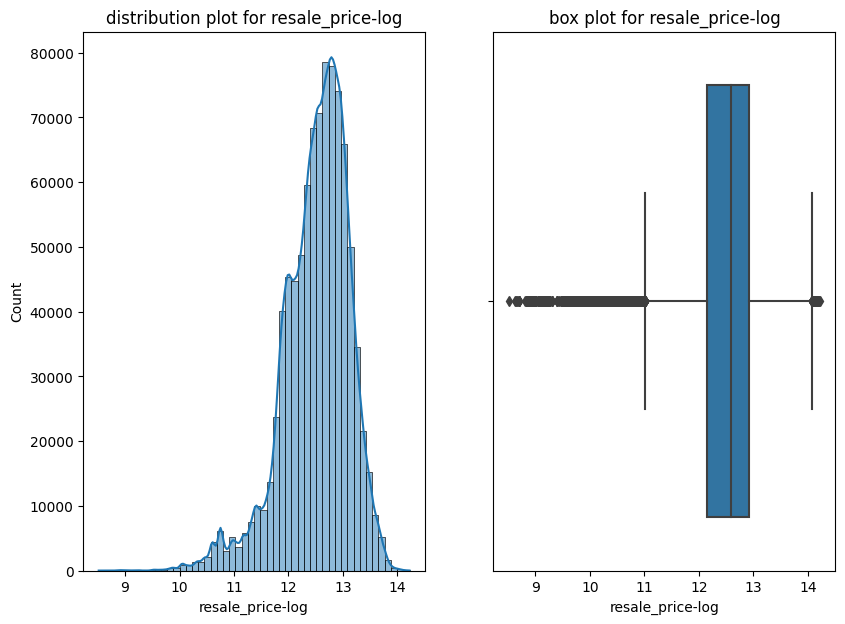

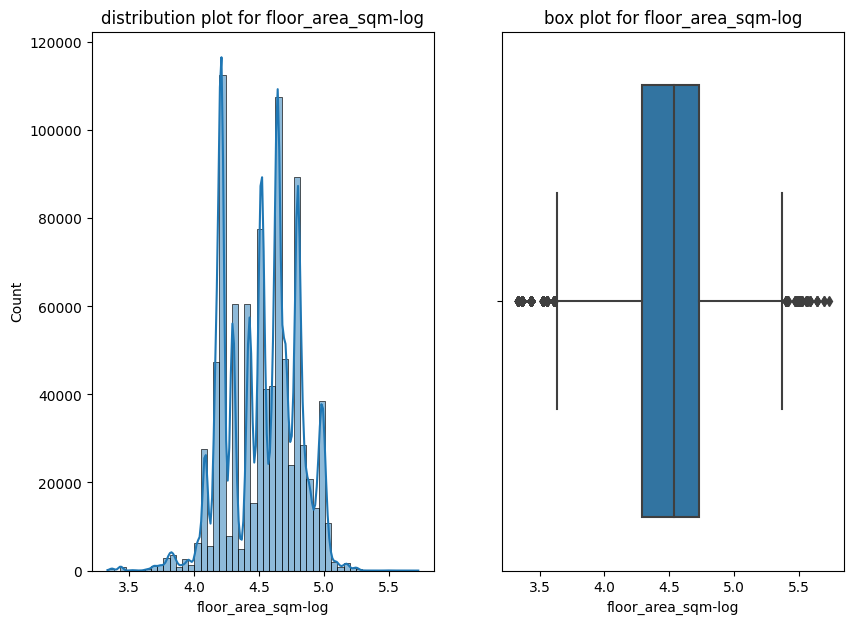

In [66]:
list2 =['resale_price-log','floor_area_sqm-log']
for i in list2:
    plot(new_data,i)

## Treating Outliers

In [67]:
def identify_outliers(a,column):
    IQR = new_data[column].quantile(0.75)-new_data[column].quantile(0.25)
    upper_value = new_data[column].quantile(0.75)+1.5*IQR
    lower_value = new_data[column].quantile(0.25)-1.5*IQR
    
    new_data[column] =     new_data[column].clip(upper_value,lower_value)

outlier =identify_outliers(new_data, 'floor_area_sqm')
outlier=identify_outliers(new_data, 'resale_price')
new_data1 = new_data.copy()

new_data1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,no_of_month,resale_price-log,floor_area_sqm-log
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,0,1990,1,9.104980,3.433987
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,0,1990,1,8.699515,3.433987
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,0,1990,1,8.987197,3.433987
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,0,1990,1,8.699515,3.433987
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,0,1990,1,10.762149,4.290459


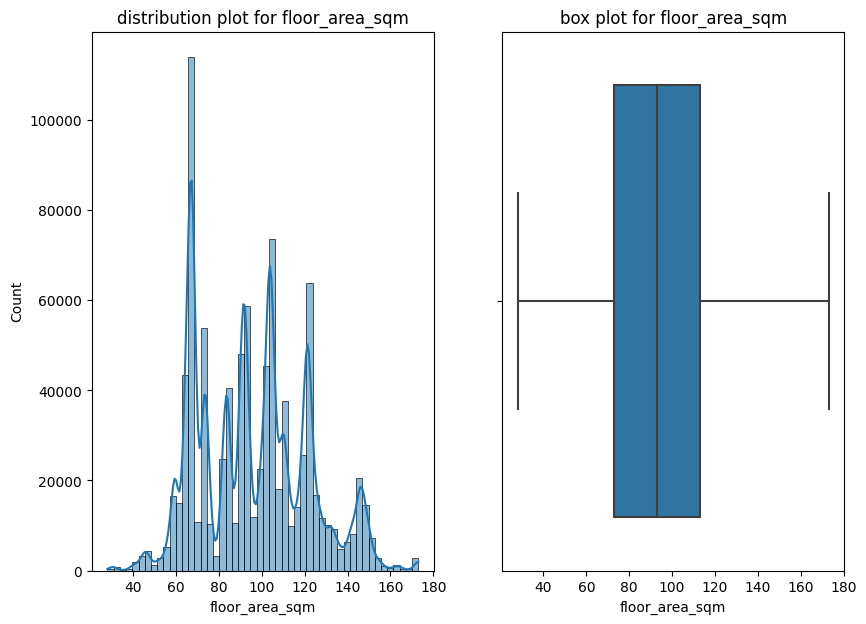

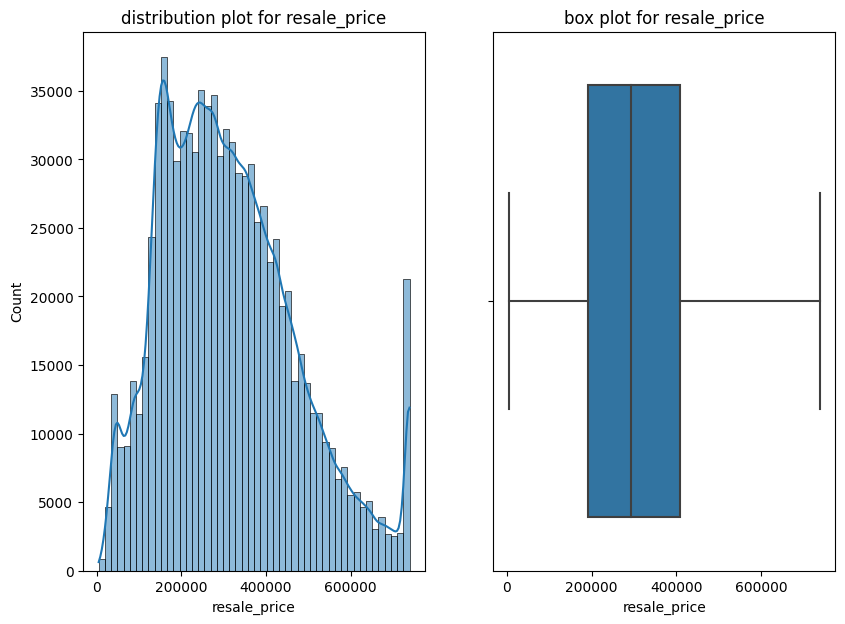

In [68]:
list3 =['floor_area_sqm','resale_price']
for i in list3:
    plot(new_data1,i)

## Encoding the Features

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

encoder =LabelEncoder()
new_data1['town']=encoder.fit_transform(new_data1['town'])
new_data1['flat_type']=encoder.fit_transform(new_data1['flat_type'])
new_data1['storey_range']=encoder.fit_transform(new_data1['storey_range'])
new_data1['flat_model']=encoder.fit_transform(new_data1['flat_model'])

In [70]:
new_data1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,no_of_month,resale_price-log,floor_area_sqm-log
0,1990-01-01,0,0,309,ANG MO KIO AVE 1,5,31.0,5,1977,9000.0,0,1990,1,9.104980,3.433987
1,1990-01-01,0,0,309,ANG MO KIO AVE 1,2,31.0,5,1977,6000.0,0,1990,1,8.699515,3.433987
2,1990-01-01,0,0,309,ANG MO KIO AVE 1,5,31.0,5,1977,8000.0,0,1990,1,8.987197,3.433987
3,1990-01-01,0,0,309,ANG MO KIO AVE 1,4,31.0,5,1977,6000.0,0,1990,1,8.699515,3.433987
4,1990-01-01,0,2,216,ANG MO KIO AVE 1,2,73.0,12,1976,47200.0,0,1990,1,10.762149,4.290459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911357,2023-11-01,26,3,454,YISHUN ST 41,2,93.0,8,2013,540000.0,88 years 10 months,2023,11,13.199324,4.532599
911358,2023-11-01,26,3,626,YISHUN ST 61,2,83.0,17,1987,480000.0,62 years 07 months,2023,11,13.081541,4.418841
911359,2023-11-01,26,3,851,YISHUN ST 81,2,104.0,8,1988,520000.0,63 years 05 months,2023,11,13.161584,4.644391
911360,2023-11-01,26,4,315C,YISHUN AVE 9,2,112.0,5,2015,645000.0,91 years,2023,11,13.377006,4.718499


In [72]:
df =new_data1.drop(['month','block','street_name','floor_area_sqm','resale_price','lease_commence_date',
                   'remaining_lease','no_of_month'],axis=1,inplace=True)

In [76]:
new_data1

,town,flat_type,storey_range,flat_model,year,resale_price-log,floor_area_sqm-log
0,0,0,5,5,1990,9.104980,3.433987
1,0,0,2,5,1990,8.699515,3.433987
2,0,0,5,5,1990,8.987197,3.433987
3,0,0,4,5,1990,8.699515,3.433987
4,0,2,2,12,1990,10.762149,4.290459
...,...,...,...,...,...,...,...
911357,26,3,2,8,2023,13.199324,4.532599
911358,26,3,2,17,2023,13.081541,4.418841
911359,26,3,2,8,2023,13.161584,4.644391
911360,26,4,2,5,2023,13.377006,4.718499


In [77]:
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


x =new_data1.drop(['resale_price-log'],axis=1)
y =new_data1['resale_price-log']

scaler =MinMaxScaler()
scaler = scaler.fit(x)


import pickle
#Saving the scaler model
pickle.dump(scaler, open('scalerModel_fit.pkl', 'wb'))

In [78]:
# Transforming the fitted model
scalar_transform =scaler.transform(x)
X =scalar_transform

In [79]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

print(f"x train :{x_train.shape}")
print(f"x test :{x_test.shape}")

x train :(683521, 6)
x test :(227841, 6)


In [80]:
# Linear Regression Model

lr =LinearRegression()
lr.fit(x_train,y_train)
train_predict = lr.predict(x_train)
test_predict = lr.predict(x_test)

print('*********LINEAR REGRESSION*********')
print('*********Train*********')
print('Mean Absolute Error :',round(mean_absolute_error(train_predict,y_train),2))
print("Mean Squared Error: ",round(mean_squared_error(train_predict,y_train),2))
print("R2: ",round(r2_score(train_predict,y_train),2))

print('*********Test*********')
print('Mean Absolute Error :',round(mean_absolute_error(test_predict,y_test),2))
print("Mean Squared Error: ",round(mean_squared_error(test_predict,y_test),2))
print("R2: ",round(r2_score(test_predict,y_test),2))

*********LINEAR REGRESSION*********
*********Train*********
Mean Absolute Error : 0.22
Mean Squared Error:  0.09
R2:  0.69
*********Test*********
Mean Absolute Error : 0.22
Mean Squared Error:  0.09
R2:  0.69


In [87]:
# Desicion tree Regressor model

from sklearn.tree import DecisionTreeRegressor


dtr_model=DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)
train_predict = dtr.predict(x_train)
test_predict = dtr.predict(x_test)

print('*********DECISSION TREE *********')
print('*********Train*********')
print('Mean Absolute Error :',round(mean_absolute_error(train_predict,y_train),2))
print("Mean Squared Error: ",round(mean_squared_error(train_predict,y_train),2))
print("R2: ",round(r2_score(train_predict,y_train),2))

print('*********Test*********')
print('Mean Absolute Error :',round(mean_absolute_error(test_predict,y_test),2))
print("Mean Squared Error: ",round(mean_squared_error(test_predict,y_test),2))
print("R2: ",round(r2_score(test_predict,y_test),2))

*********DECISSION TREE *********
*********Train*********
Mean Absolute Error : 0.05
Mean Squared Error:  0.01
R2:  0.98
*********Test*********
Mean Absolute Error : 0.08
Mean Squared Error:  0.01
R2:  0.97


In [83]:
# Random Forest model

from sklearn.ensemble import RandomForestRegressor

rfr_m =RandomForestRegressor(max_depth = 6, min_samples_split = 10, min_samples_leaf = 35, max_leaf_nodes = 5)
rfr_m.fit(x_train,y_train)
train_predict = rfr_m.predict(x_train)
test_predict = rfr_m.predict(x_test)

print('*********RANDOM FOREST*********')
print('*********Train*********')
print('Mean Absolute Error :',mean_absolute_error(train_predict,y_train))
print("Mean Squared Error: ",mean_squared_error(train_predict,y_train))
print("R2: ",r2_score(train_predict,y_train))

print('*********Test*********')
print('Mean Absolute Error :',mean_absolute_error(test_predict,y_test))
print("Mean Squared Error: ",mean_squared_error(test_predict,y_test))
print("R2: ",r2_score(test_predict,y_test))

*********RANDOM FOREST*********
*********Train*********
Mean Absolute Error : 0.2495626815690375
Mean Squared Error:  0.10154716110102759
R2:  0.6193170725547048
*********Test*********
Mean Absolute Error : 0.2502860973022973
Mean Squared Error:  0.10179802249699933
R2:  0.6164133488701743


## Saving the best fit model

In [90]:
import pickle

with open('dtr_model.pkl', 'wb') as f:
    pickle.dump(dtr_model, f)

In [100]:
x.to_csv('singapore Dataset.csv')

In [93]:
# test 1

with open(r"C:\Users\barathy\dtr_model.pkl",'rb') as f:
    model =pickle.load(f)
    
    user_data = np.array([[11,4,5,8,2003,5.4324]])
    prediction = model.predict(user_data)
    
    predicted_price = predictio
    
    predicted_price=np.exp(predicted_price)

In [94]:
predicted_price

1079999.9999999993

In [97]:
with open(r"C:\Users\barathy\dtr_model.pkl",'rb') as f:
    model =pickle.load(f)
    
    user_data = np.array([[3,5,7,2,2023,5.4324]])
    prediction = model.predict(user_data)
    
    predicted_price = prediction[0]
    
    predicted_price=np.exp(predicted_price)

In [98]:
predicted_price

1079999.9999999993

In [101]:
x

,town,flat_type,storey_range,flat_model,year,floor_area_sqm-log
0,0,0,5,5,1990,3.433987
1,0,0,2,5,1990,3.433987
2,0,0,5,5,1990,3.433987
3,0,0,4,5,1990,3.433987
4,0,2,2,12,1990,4.290459
...,...,...,...,...,...,...
911357,26,3,2,8,2023,4.532599
911358,26,3,2,17,2023,4.418841
911359,26,3,2,8,2023,4.644391
911360,26,4,2,5,2023,4.718499
